In [61]:
import pathlib
import seaborn as sns
import lib.utils as utils
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

Daten aus Datenbank exportieren und in Dataframe speichern

In [62]:
url = 'https://glusfqycvwrucp9-db202202211424.adb.eu-zurich-1.oraclecloudapps.com/ords/sensor_datalake1/sens/insert/'
df = utils.get_all_pages(url)

Daten in csv exportieren

In [63]:
#df.to_csv('data_smartclassroom.csv')

In [64]:
df.head()

,entry_id,insert_time,sensor_id,value1,unit1
0,2291,2022-03-30T14:49:51.283Z,CIRCUITPY323d,785.0,PPM
1,2304,2022-03-30T14:56:37.668Z,CIRCUITPY323d,27.4,C
2,2307,2022-03-30T14:57:37.983Z,CIRCUITPY323d,27.4,C
3,2311,2022-03-30T14:58:40.293Z,CIRCUITPY323d,31.1,%
4,2328,2022-03-30T15:04:41.298Z,CIRCUITPY323d,27.7,C


Zeitzone anpassen

In [65]:
#convert inser_time to timedate
df['insert_time'] = pd.to_datetime(df['insert_time'])
#and add 2 hours to insert time
df['insert_time'] = df['insert_time'] + pd.Timedelta(hours=2)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130952 entries, 0 to 130951
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   entry_id     130952 non-null  int64              
 1   insert_time  130952 non-null  datetime64[ns, UTC]
 2   sensor_id    130952 non-null  object             
 3   value1       130952 non-null  float64            
 4   unit1        130952 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 5.0+ MB


Daten für Analyse restrukturieren

In [66]:
#pivot
df_pivot = df.pivot_table(index='insert_time',columns=['sensor_id','unit1'],values='value1')
#multindex to single index
df_pivot.columns =	df_pivot.columns.map('_'.join)
#resample on 1min time windows
df_pivot = df_pivot.resample('1Min').agg({
                                            'CIRCUITPY323d_PPM':'mean', 
                                            'CIRCUITPY323d_C':'mean',
                                            'CIRCUITPY323d_%':'mean',
                                            'CIRCUITPY825a_Window':'last',
                                            'CIRCUITPYbec9_Person':'last'
                                            })
df_pivot.head(30)

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person
insert_time,,,,,
2022-03-24 16:02:00+00:00,1068.800000,26.600000,34.600000,0.0,NaN
2022-03-24 16:03:00+00:00,1073.700000,26.500000,32.500000,NaN,NaN
2022-03-24 16:04:00+00:00,1061.600000,26.400000,33.450000,NaN,NaN
2022-03-24 16:05:00+00:00,1072.400000,26.400000,33.950000,NaN,NaN
2022-03-24 16:06:00+00:00,1115.650000,26.400000,34.150000,NaN,NaN
2022-03-24 16:07:00+00:00,1145.600000,26.400000,34.700000,NaN,NaN
2022-03-24 16:08:00+00:00,1142.450000,26.400000,35.000000,NaN,NaN
2022-03-24 16:09:00+00:00,1152.500000,26.400000,35.550000,NaN,NaN
2022-03-24 16:10:00+00:00,1200.900000,26.400000,35.850000,NaN,NaN


In [67]:
#select specific time window
df_timewindow = df_pivot.loc['2022-04-15 00:00:00':'2022-05-04 23:59:00']

Leere Zeilen augrund der Restruktuierung befüllen bei Window und Personen

In [68]:
#Fill Nan for window sensor
df_timewindow['CIRCUITPY825a_Window'].fillna(method='ffill',inplace=True)
df_timewindow['CIRCUITPY825a_Window'].fillna(method='bfill',inplace=True)
#Fill Nan for people sensor
df_timewindow['CIRCUITPYbec9_Person'].fillna(method='ffill',inplace=True)
#Fill Nan for first entry for people sensor
df_timewindow['CIRCUITPYbec9_Person'].fillna(method='bfill',inplace=True)

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


NA's betrachten und imputieren bei PPM, Temperatur und Luftfeuchtigkeit

In [69]:
df_timewindow.isna().sum()

CIRCUITPY323d_PPM       5298
CIRCUITPY323d_C         5301
CIRCUITPY323d_%         5292
CIRCUITPY825a_Window       0
CIRCUITPYbec9_Person       0
dtype: int64

Neues Dataframe für Imputation

In [70]:
df_timewindow_clean = df_timewindow.copy()
#imputer = IterativeImputer(n_neighbors=50, weights='uniform', missing_values=np.nan, copy=True)
imputer = IterativeImputer(missing_values=np.nan)
#df_timewindow_clean.CIRCUITPY323d_PPM = imputer.fit_transform(df_timewindow_clean.CIRCUITPY323d_PPM.values.reshape(-1,1))
#df_timewindow_clean.CIRCUITPY323d_C = imputer.fit_transform(df_timewindow_clean.CIRCUITPY323d_C.values.reshape(-1,1))
#df_timewindow_clean["CIRCUITPY323d_%"] = imputer.fit_transform(df_timewindow_clean["CIRCUITPY323d_%"].values.reshape(-1,1))

In [71]:
df_timewindow_clean.CIRCUITPY323d_PPM = df_timewindow_clean.CIRCUITPY323d_PPM.interpolate(method='pchip')
df_timewindow_clean.CIRCUITPY323d_C = df_timewindow_clean.CIRCUITPY323d_C.interpolate(method='pchip')
df_timewindow_clean["CIRCUITPY323d_%"] = df_timewindow_clean["CIRCUITPY323d_%"].interpolate(method='pchip')

In [72]:
#neue Variable die die Luftqualität Quantitativ einordnet
df_timewindow_clean['air_quality'] =np.where(df_timewindow_clean['CIRCUITPY323d_PPM']<600, 'top',
                   np.where(df_timewindow_clean['CIRCUITPY323d_PPM']<1000, 'good',
                   np.where(df_timewindow_clean['CIRCUITPY323d_PPM']<1400, 'ok', 'bad')))

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


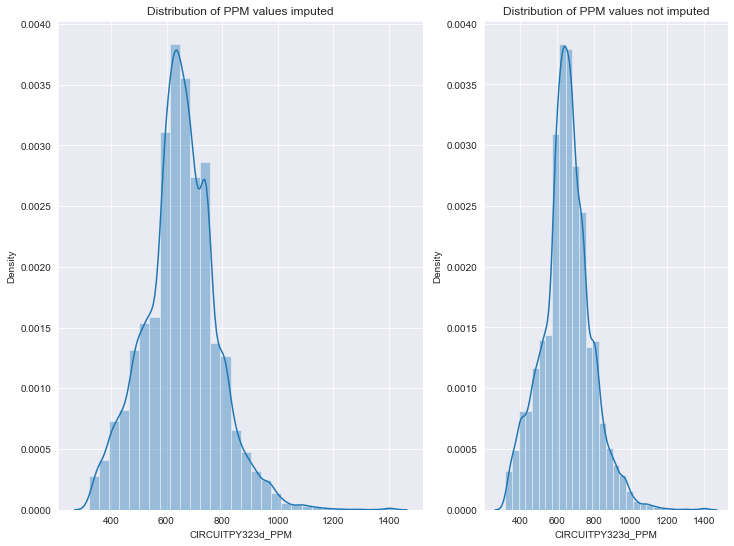

In [73]:
#Distribution of PPM values original vs imputed
f, axs = plt.subplots(1,2, figsize=(12,9), gridspec_kw=dict(width_ratios=[15,10]))
sns.distplot(df_timewindow_clean.CIRCUITPY323d_PPM, ax=axs[0], bins=30).set_title('Distribution of PPM values imputed')
sns.distplot(df_timewindow.CIRCUITPY323d_PPM, ax=axs[1], bins=30).set_title('Distribution of PPM values not imputed')
plt.show()

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


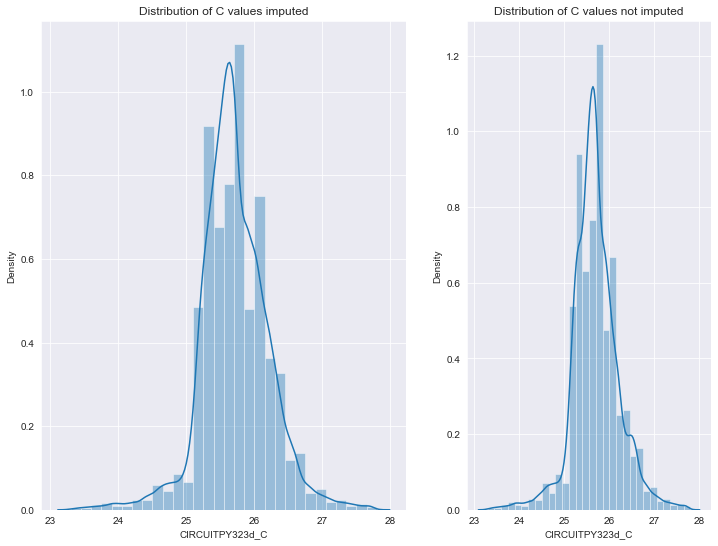

In [74]:
#Distribution of C values original vs imputed
f, axs = plt.subplots(1,2, figsize=(12,9), gridspec_kw=dict(width_ratios=[15,10]))
sns.distplot(df_timewindow_clean.CIRCUITPY323d_C, ax=axs[0], bins=30).set_title('Distribution of C values imputed')
sns.distplot(df_timewindow.CIRCUITPY323d_C, ax=axs[1], bins=30).set_title('Distribution of C values not imputed')
plt.show()

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


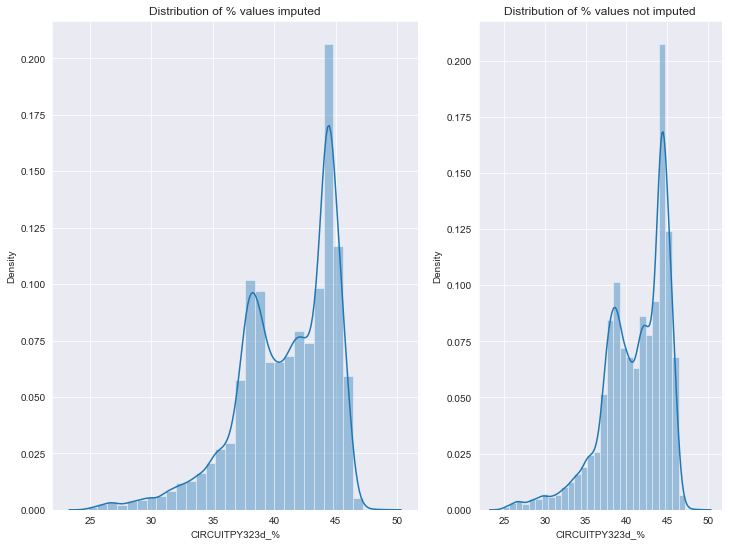

In [75]:
#Distribution of % values original vs imputed
f, axs = plt.subplots(1,2, figsize=(12,9), gridspec_kw=dict(width_ratios=[15,10]))
sns.distplot(df_timewindow_clean["CIRCUITPY323d_%"], ax=axs[0], bins=30).set_title('Distribution of % values imputed')
sns.distplot(df_timewindow["CIRCUITPY323d_%"], ax=axs[1], bins=30).set_title('Distribution of % values not imputed')
plt.show()

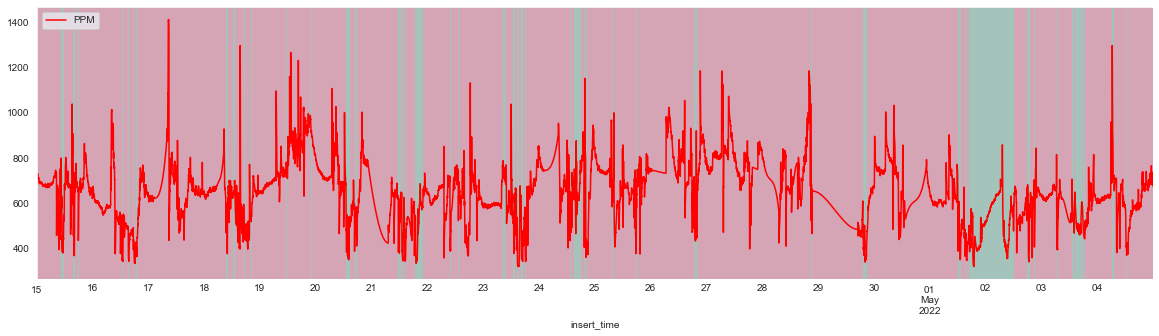

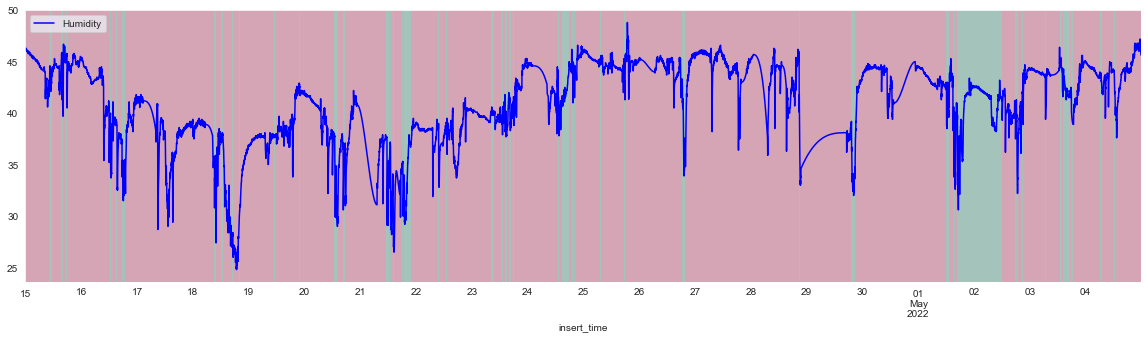

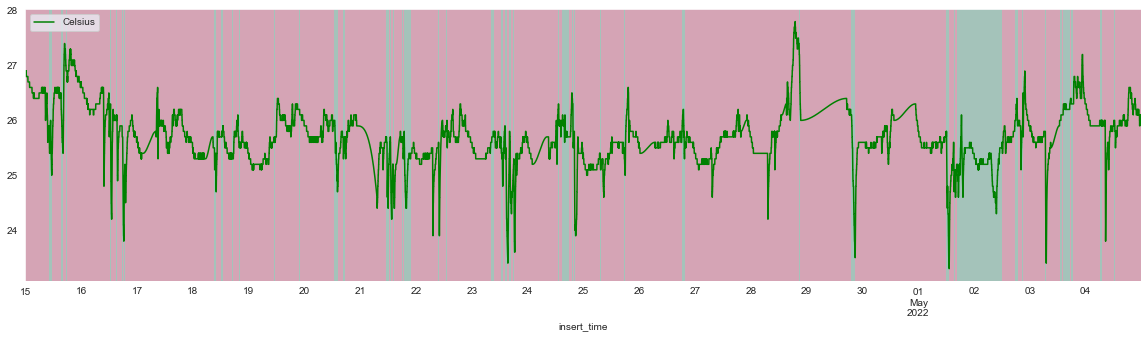

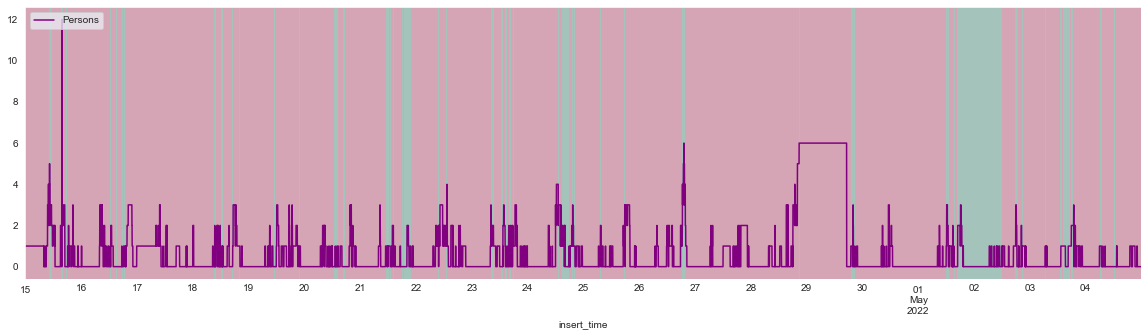

In [76]:
#linechart cobined with bar chart
#if windows sensor 1 blue line if windows sensor 0 red line
# Use a boundary norm instead
fig, ax1 = plt.subplots()
#hide grid
ax1 = df_timewindow_clean['CIRCUITPY323d_PPM'].plot(kind='line',color='red',label='PPM', grid=False)
ax1.pcolorfast(ax1.get_xlim(), ax1.get_ylim(),df_timewindow_clean['CIRCUITPY825a_Window'].values[np.newaxis],cmap='RdYlGn', alpha=0.3,label='Windows')
#set size
ax1.figure.set_size_inches(20, 5)
#show legend
ax1.legend(loc='upper left')
plt.show()
fig, ax1 = plt.subplots()
#hide grid
ax1 = df_timewindow_clean['CIRCUITPY323d_%'].plot(kind='line',color='blue',label='Humidity', grid=False)
ax1.pcolorfast(ax1.get_xlim(), ax1.get_ylim(),df_timewindow_clean['CIRCUITPY825a_Window'].values[np.newaxis],cmap='RdYlGn', alpha=0.3,label='Windows')
#set size
ax1.figure.set_size_inches(20, 5)
#show legend
ax1.legend(loc='upper left')
plt.show()

fig, ax1 = plt.subplots()
#hide grid
ax1 = df_timewindow_clean['CIRCUITPY323d_C'].plot(kind='line',color='green',label='Celsius', grid=False)
ax1.pcolorfast(ax1.get_xlim(), ax1.get_ylim(),df_timewindow_clean['CIRCUITPY825a_Window'].values[np.newaxis],cmap='RdYlGn', alpha=0.3,label='Windows')
#set size
ax1.figure.set_size_inches(20, 5)
#show legend
ax1.legend(loc='upper left')
plt.show()

fig, ax1 = plt.subplots()
#hide grid
ax1 = df_timewindow_clean['CIRCUITPYbec9_Person'].plot(kind='line',color='purple',label='Persons', grid=False)
ax1.pcolorfast(ax1.get_xlim(), ax1.get_ylim(),df_timewindow_clean['CIRCUITPY825a_Window'].values[np.newaxis],cmap='RdYlGn', alpha=0.3,label='Windows')
#set size
ax1.figure.set_size_inches(20, 5)
#show legend
ax1.legend(loc='upper left')
plt.show()

In [77]:
#calculate correleation between two columns
df_timewindow_clean.corr(method="pearson")

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window,CIRCUITPYbec9_Person
CIRCUITPY323d_PPM,1.000000,0.287445,0.474982,-0.353515,-0.063613
CIRCUITPY323d_C,0.287445,1.000000,0.229099,-0.225714,0.292090
CIRCUITPY323d_%,0.474982,0.229099,1.000000,-0.174733,-0.212145
CIRCUITPY825a_Window,-0.353515,-0.225714,-0.174733,1.000000,0.037361
CIRCUITPYbec9_Person,-0.063613,0.292090,-0.212145,0.037361,1.000000


Janis Ideen data wrangling

In [78]:
df_timewindow_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28800 entries, 2022-04-15 00:00:00+00:00 to 2022-05-04 23:59:00+00:00
Freq: T
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CIRCUITPY323d_PPM     28800 non-null  float64
 1   CIRCUITPY323d_C       28800 non-null  float64
 2   CIRCUITPY323d_%       28800 non-null  float64
 3   CIRCUITPY825a_Window  28800 non-null  float64
 4   CIRCUITPYbec9_Person  28800 non-null  float64
 5   air_quality           28800 non-null  object 
dtypes: float64(5), object(1)
memory usage: 1.5+ MB


/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


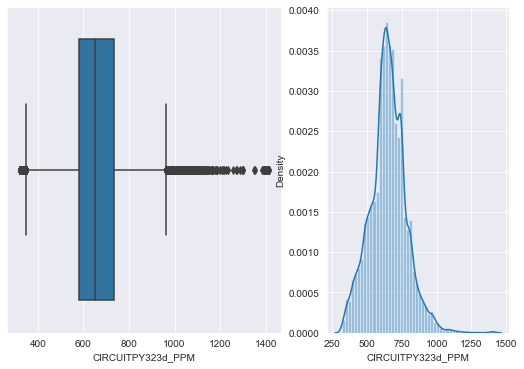

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


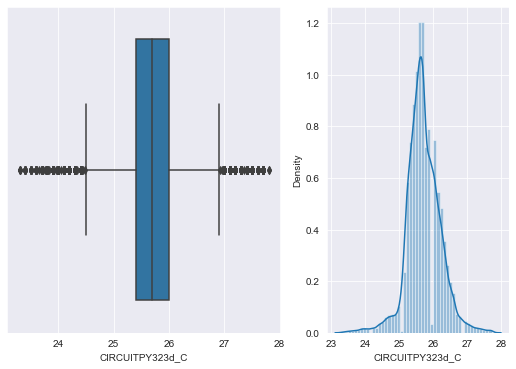

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


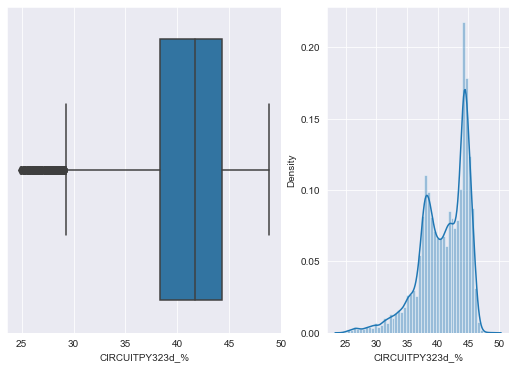

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


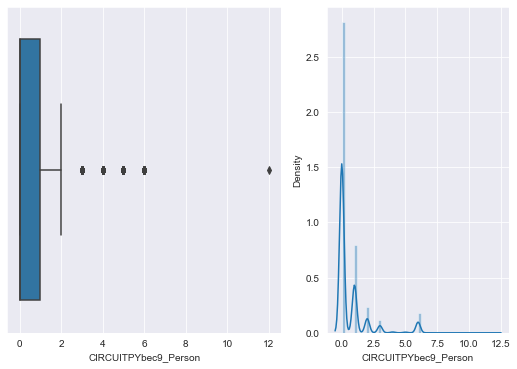

In [79]:
#detect outliers in PPM data
#print boxlot
utils.overview(df_timewindow_clean, "CIRCUITPY323d_PPM")
utils.overview(df_timewindow_clean, "CIRCUITPY323d_C")
utils.overview(df_timewindow_clean, "CIRCUITPY323d_%")
utils.overview(df_timewindow_clean, "CIRCUITPYbec9_Person")

<AxesSubplot:title={'center':'CIRCUITPY323d_PPM'}, xlabel='CIRCUITPYbec9_Person'>

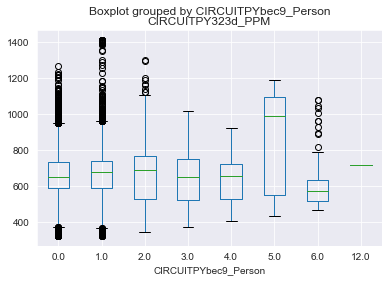

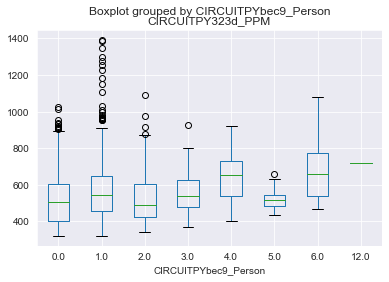

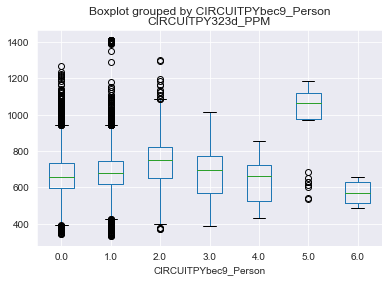

In [80]:
#group per persons and give the average value
df_timewindow_clean.groupby('CIRCUITPYbec9_Person').mean()

#plot boxplot per group for PPM
df_timewindow_clean.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')

#splitt dataframe where window sensor is 1 and 0
df_timewindow_clean_1 = df_timewindow_clean[df_timewindow_clean['CIRCUITPY825a_Window']==1]
df_timewindow_clean_0 = df_timewindow_clean[df_timewindow_clean['CIRCUITPY825a_Window']==0]

#splitt dataframe where window sensor is 0 and person is greater than 0
df_timewindow_clean_0_person = df_timewindow_clean_0[df_timewindow_clean_0['CIRCUITPYbec9_Person']>0]

df_timewindow_clean_1.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')
df_timewindow_clean_0.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')

<AxesSubplot:title={'center':'CIRCUITPY323d_PPM'}, xlabel='CIRCUITPYbec9_Person'>

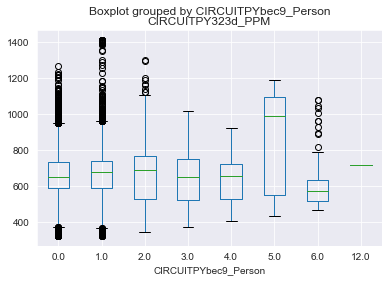

In [81]:
df_timewindow_clean.boxplot(column='CIRCUITPY323d_PPM',by='CIRCUITPYbec9_Person')

,CIRCUITPY323d_PPM,CIRCUITPY323d_C,CIRCUITPY323d_%,CIRCUITPY825a_Window
CIRCUITPYbec9_Person,,,,
0.0,658.000000,25.600000,43.000000,0.0
1.0,681.050000,25.800000,41.300000,0.0
2.0,750.251763,25.900000,41.500000,0.0
3.0,698.250000,25.900000,40.600000,0.0
4.0,661.900000,25.900000,42.500000,0.0
5.0,1067.000000,27.400000,45.400000,0.0
6.0,569.891766,26.199745,37.644875,0.0


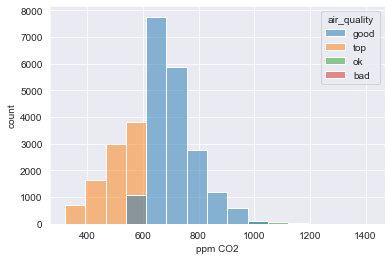

In [112]:
# group PPM in 100 bins
sns.histplot(bins=15, hue='air_quality', data=df_timewindow_clean, x='CIRCUITPY323d_PPM')
plt.xlabel('ppm CO2')
plt.ylabel('count')
#plt.legend(["top", "good", "ok", "bad"])

#what is the median person in those bins
df_timewindow_clean_0.groupby('CIRCUITPYbec9_Person').median()

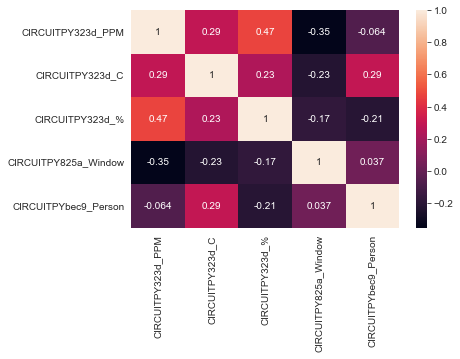

In [111]:
sns.heatmap(df_timewindow_clean.corr(method="pearson"), annot=True)
plt.show()

Datenaufbereitung

In [83]:
#select specific time window
df_timewindow_clean_person = df_timewindow_clean.loc['2022-04-22 07:11:30':'2022-04-22 09:30:00']

In [84]:
#new dataframes window open and closed
df_window_open = df_timewindow_clean[df_timewindow_clean["CIRCUITPY825a_Window"]==1]
df_window_closed = df_timewindow_clean[df_timewindow_clean["CIRCUITPY825a_Window"]==0]

In [85]:
#Mean time window open
index_closed = [0]
t_diff_closed = []
for i in range(len(df_timewindow_clean)):
    if (df_timewindow_clean.iloc[i]['CIRCUITPY825a_Window'] == 1.0) and (index_closed[-1] < i):
        index_closed.append(i)
        t_diff_closed.append(df_timewindow_clean.index[index_closed[-1]] - df_timewindow_clean.index[index_closed[-2]])
        next_zero_closed = index_closed[-1]
        while df_timewindow_clean.iloc[next_zero_closed]['CIRCUITPY825a_Window'] != 0:
            next_zero_closed += 1
        index_closed.append(next_zero_closed)

In [86]:
index_open = []
t_diff_open = []
next_step = 0
while df_timewindow_clean.iloc[next_step]['CIRCUITPY825a_Window'] != 1:
    next_step += 1
index_open.append(next_step)

for i in range(next_step, len(df_timewindow_clean)):
    if (df_timewindow_clean.iloc[i]['CIRCUITPY825a_Window'] == 0.0) and (index_open[-1] < i):
        index_open.append(i)
        t_diff_open.append(df_timewindow_clean.index[index_open[-1]] - df_timewindow_clean.index[index_open[-2]])
        next_zero_open = index_open[-1]
        while (next_zero_open < (len(df_timewindow_clean)-2)):
            if df_timewindow_clean.iloc[next_zero_open]['CIRCUITPY825a_Window'] == 1.0:
                break
            else:
                next_zero_open += 1
        index_open.append(next_zero_open)

In [87]:
df_mean_ppm_window = pd.DataFrame({"mean_ppm_window_open":[df_timewindow_clean.loc[df_timewindow_clean['CIRCUITPY825a_Window']==1]["CIRCUITPY323d_PPM"].mean()],"mean_ppm_window_closed":[df_timewindow_clean.loc[(df_timewindow_clean['CIRCUITPY825a_Window']==0) & (df_timewindow_clean["CIRCUITPYbec9_Person"]>1)]["CIRCUITPY323d_PPM"].mean()]})

In [88]:
#Create new dataframe with time window open and change in ppm
df_timewindow_clean_open = pd.DataFrame({"time_diff": t_diff_open,"diff_humidity_%":0, "ppm_diff":0, "ppm_per_min":0, "people_counter":0})

In [89]:
count = 0
for i in range(0,(len(index_open)-1),2):
    df_timewindow_clean_open["ppm_diff"][count] = df_timewindow_clean["CIRCUITPY323d_PPM"][index_open[i+1]] - df_timewindow_clean["CIRCUITPY323d_PPM"][index_open[i]]
    people_counter = 0
    df_timewindow_clean_open["diff_humidity_%"][count] = df_timewindow_clean["CIRCUITPY323d_%"][index_open[i+1]] - df_timewindow_clean["CIRCUITPY323d_%"][index_open[i]]
    for n in range(index_open[i],index_open[i+1]):
        people_counter += df_timewindow_clean["CIRCUITPYbec9_Person"][n]
    if (people_counter > 0) and (df_timewindow_clean_open['time_diff'][count] / np.timedelta64(1, 'm') > 0):
        df_timewindow_clean_open["people_counter"][count] = people_counter/(df_timewindow_clean_open["time_diff"][count] / np.timedelta64(1, 'm'))
    count += 1

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1765/725443333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_open["ppm_diff"][count] = df_timewindow_clean["CIRCUITPY323d_PPM"][index_open[i+1]] - df_timewindow_clean["CIRCUITPY323d_PPM"][index_open[i]]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1765/725443333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_open["diff_humidity_%"][count] = df_timewindow_clean["CIRCUITPY323d_%"][index_open[i+1]] - df_timewindow_clean["CIRCUITPY323d_%"][index_open[i]]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/

In [90]:
#fill ppm_per_min with ppm_diff/time_diff
for i in range(len(df_timewindow_clean_open)):
    df_timewindow_clean_open["ppm_per_min"][i] = df_timewindow_clean_open["ppm_diff"][i]/(df_timewindow_clean_open["time_diff"][i].seconds/60)

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1765/3120939671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_open["ppm_per_min"][i] = df_timewindow_clean_open["ppm_diff"][i]/(df_timewindow_clean_open["time_diff"][i].seconds/60)


In [91]:
df_timewindow_clean_open.dropna(inplace=True)

In [92]:
df_timewindow_clean_open = df_timewindow_clean_open[df_timewindow_clean_open["time_diff"] > pd.Timedelta(minutes=1)]

In [93]:
#Create new dataframe with time window closed and change in ppm
df_timewindow_clean_closed = pd.DataFrame({"time_diff": t_diff_closed,"diff_humidity_%":0,"diff_temp":0, "ppm_diff":0, "ppm_per_min":0, "people_counter":0})

In [94]:
person_counter = 0
for i in range(index_closed[0], index_closed[1]):
    person_counter += df_timewindow_clean["CIRCUITPYbec9_Person"][i]

In [95]:
count = 0
for i in range(0,(len(index_closed)-1),2):
    df_timewindow_clean_closed["ppm_diff"][count] = df_timewindow_clean["CIRCUITPY323d_PPM"][index_closed[i+1]] - df_timewindow_clean["CIRCUITPY323d_PPM"][index_closed[i]]
    people_counter = 0
    df_timewindow_clean_closed["diff_humidity_%"][count] = df_timewindow_clean["CIRCUITPY323d_%"][index_closed[i+1]] - df_timewindow_clean["CIRCUITPY323d_%"][index_closed[i]]
    df_timewindow_clean_closed["diff_temp"][count] = df_timewindow_clean["CIRCUITPY323d_C"][index_closed[i+1]] - df_timewindow_clean["CIRCUITPY323d_C"][index_closed[i]]
    for n in range(index_closed[i],index_closed[i+1]):
        people_counter += df_timewindow_clean["CIRCUITPYbec9_Person"][n]
    if (people_counter > 0) and (df_timewindow_clean_closed['time_diff'][count] / np.timedelta64(1, 'm') > 0):
        df_timewindow_clean_closed["people_counter"][count] = people_counter/(df_timewindow_clean_closed["time_diff"][count] / np.timedelta64(1, 'm'))
    count += 1

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1765/1515084101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_closed["ppm_diff"][count] = df_timewindow_clean["CIRCUITPY323d_PPM"][index_closed[i+1]] - df_timewindow_clean["CIRCUITPY323d_PPM"][index_closed[i]]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1765/1515084101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_closed["diff_humidity_%"][count] = df_timewindow_clean["CIRCUITPY323d_%"][index_closed[i+1]] - df_timewindow_clean["CIRCUITPY323d_%"][index_closed[i]]
/var/folders/f0/pqy2clvx0nv38xm_n

In [96]:
#fill ppm_per_min with ppm_diff/time_diff
for i in range(len(df_timewindow_clean_closed)):
    df_timewindow_clean_closed["ppm_per_min"][i] = df_timewindow_clean_closed["ppm_diff"][i]/(df_timewindow_clean_closed["time_diff"][i].seconds/60)

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1765/2512564026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timewindow_clean_closed["ppm_per_min"][i] = df_timewindow_clean_closed["ppm_diff"][i]/(df_timewindow_clean_closed["time_diff"][i].seconds/60)


In [97]:
df_timewindow_clean_closed = df_timewindow_clean_closed[df_timewindow_clean_closed["people_counter"] < 4]

In [98]:
df_timewindow_clean_closed.dropna(inplace=True)

In [99]:
df_timewindow_clean_closed = df_timewindow_clean_closed[df_timewindow_clean_closed["time_diff"] > pd.Timedelta(minutes=1)]
df_timewindow_clean_closed = df_timewindow_clean_closed[df_timewindow_clean_closed["ppm_diff"] > 0 ]

In [100]:
df_change_ppm = pd.DataFrame({"ppm_per_min_open":[df_timewindow_clean_open["ppm_per_min"].mean()],"ppm_per_min_closed":[df_timewindow_clean_closed["ppm_per_min"].mean()]})

In [101]:
df_mean_window_open_closed = pd.DataFrame({"mean_ppm_window_open":[df_timewindow_clean_open["time_diff"].mean()],"mean_ppm_window_closed":[df_timewindow_clean_closed['time_diff'].mean()]})

In [102]:
df_mean_window_open_closed["mean_ppm_window_open"][0] = df_mean_window_open_closed["mean_ppm_window_open"][0] / np.timedelta64(1, 'm')
df_mean_window_open_closed["mean_ppm_window_closed"][0] = df_mean_window_open_closed["mean_ppm_window_closed"][0] / np.timedelta64(1, 'm')

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_1765/2212474776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mean_window_open_closed["mean_ppm_window_closed"][0] = df_mean_window_open_closed["mean_ppm_window_closed"][0] / np.timedelta64(1, 'm')


In [103]:
df_lueften_daten = pd.DataFrame(columns = ["ppm_wert", "zeit_diff"])

In [104]:
summe_ppm = 600
time_delta = 0
index = 0
while summe_ppm < 1000:
    df_lueften_daten = df_lueften_daten.append({"ppm_wert": summe_ppm}, ignore_index=True)
    df_lueften_daten["zeit_diff"][index] = time_delta
    time_delta += 1
    summe_ppm += df_timewindow_clean_closed["ppm_per_min"].mean()
    index += 1
while summe_ppm > 600:
    df_lueften_daten = df_lueften_daten.append({"ppm_wert": summe_ppm}, ignore_index=True)
    df_lueften_daten["zeit_diff"][index] = time_delta
    time_delta += 1
    summe_ppm += df_timewindow_clean_open["ppm_per_min"].mean()
    index += 1

Visualisierungen

<Figure size 1440x360 with 0 Axes>

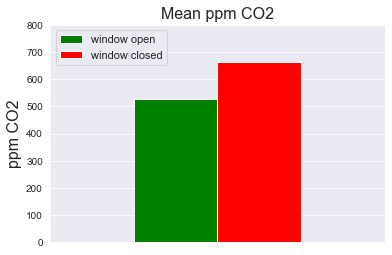

In [105]:
#barplot of mean ppm values
plt.figure(figsize=(20,5))
df_mean_ppm_window.plot(kind='bar',color=['green','red'],grid=True,ylim=(0,800))
plt.title("Mean ppm CO2", fontsize=16)
plt.ylabel("ppm CO2",fontsize=16)
plt.legend(["window open","window closed"],fontsize=11)
plt.xticks([])
plt.show()

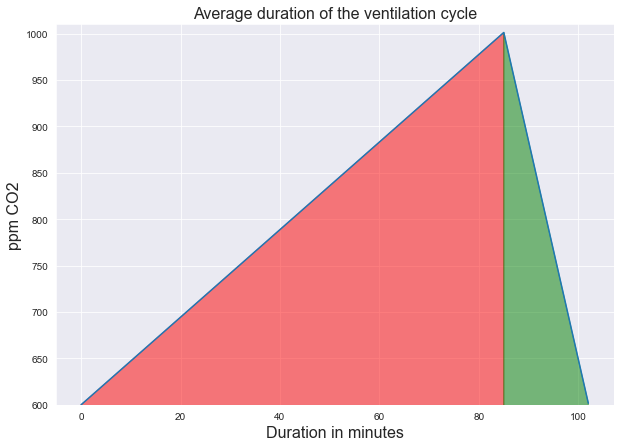

In [106]:
#plot ppm_wert vs zeit_diff
plt.figure(figsize=(10,7))
sns.lineplot(x="zeit_diff", y="ppm_wert", data=df_lueften_daten)
plt.ylabel("ppm CO2",fontsize=16)
plt.xlabel("Duration in minutes",fontsize=16)
plt.title("Average duration of the ventilation cycle",fontsize=16)
plt.ylim(600,1010)
plt.fill_between(df_lueften_daten["zeit_diff"], df_lueften_daten["ppm_wert"], where=df_lueften_daten["zeit_diff"]<=85, color='red', alpha=0.5)
plt.fill_between(df_lueften_daten["zeit_diff"], df_lueften_daten["ppm_wert"],  where=df_lueften_daten["zeit_diff"]>=85, color='green', alpha=0.5)

<Figure size 1440x360 with 0 Axes>

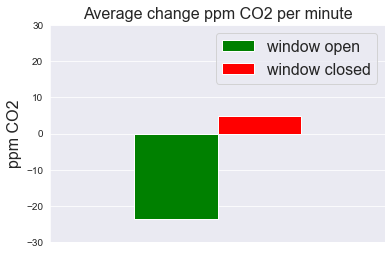

In [107]:
df_change_ppm
plt.figure(figsize=(20, 5))
df_change_ppm.plot(kind='bar', color=['green', 'red'], grid=True ,ylim=(-30, 30))
plt.title("Average change ppm CO2 per minute",fontsize=16)
plt.legend(["window open","window closed"],fontsize=16)
plt.ylabel("ppm CO2",fontsize=16)
plt.xticks([])
plt.show()

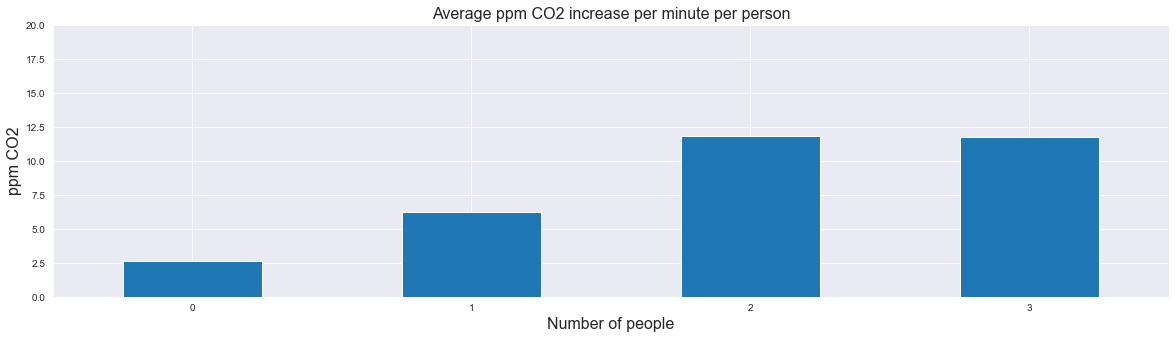

In [108]:
plt.figure(figsize=(20,5))
df_timewindow_clean_closed.groupby("people_counter").mean()["ppm_per_min"].plot(kind='bar',grid=True,ylim=(0,20))
plt.ylabel("ppm CO2",fontsize=16)
#turn x ticks 90 degrees
plt.xticks(rotation=0)
plt.title("Average ppm CO2 increase per minute per person",fontsize=16)
plt.xlabel("Number of people",fontsize=16)
plt.show()

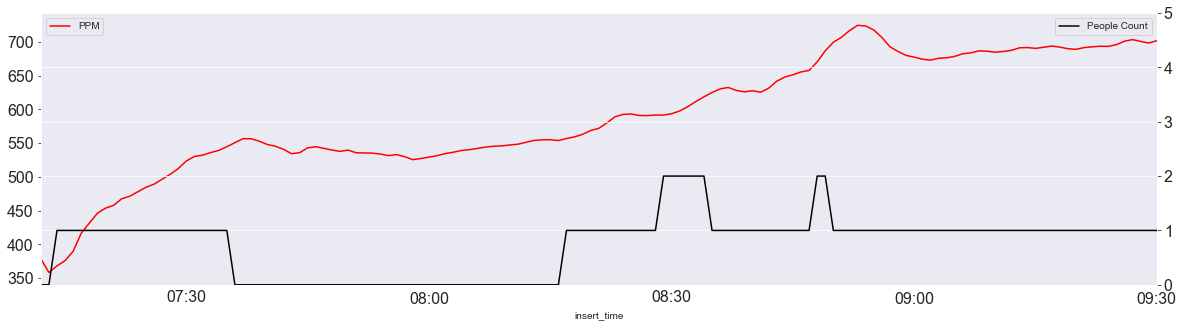

In [109]:
#linechart cobined with bar chart
#if windows sensor 1 blue line if windows sensor 0 red line
# Use a boundary norm instead
fig, ax1 = plt.subplots()
#hide grid
ax1 = df_timewindow_clean_person['CIRCUITPY323d_PPM'].plot(kind='line',color='red',label='PPM', grid=False,fontsize=16)
ax3 = ax1.twinx()
ax2 = df_timewindow_clean_person['CIRCUITPYbec9_Person'].plot(kind='line',color='black',label='People Count',ylim=(0,5),fontsize=16)
#set size
ax1.figure.set_size_inches(20, 5)
#show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

<Figure size 1440x360 with 0 Axes>

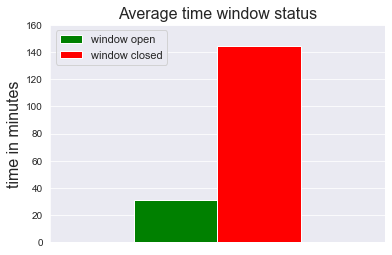

In [110]:
plt.figure(figsize=(20,5))
df_mean_window_open_closed.plot(kind='bar',color=['green','red'],grid=True,ylim=(0,160))
plt.title("Average time window status",fontsize=16)
plt.legend(["window open","window closed"],fontsize=11)
plt.ylabel("time in minutes",fontsize=16)
plt.xticks([])
plt.show()